In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

def load(path: str) -> pd.DataFrame:
    """Load a CSV file into a Dataset object.

    Args:
        path (str): path to the CSV file

    Returns:
        Dataset: object containing the data
    """
    try:
        if not path.lower().endswith(("csv")):
            raise AssertionError("Only csv formats are supported.")
        local_dir = os.path.abspath('')
        file_path = os.path.join(local_dir, path)
        if not os.path.exists(file_path) or os.path.isdir(file_path):
            raise AssertionError("File not found:", file_path)
        df = pd.read_csv(file_path)
        return df
    except AssertionError as error:
        print(f"{AssertionError.__name__}: {error}")
        return None

/home/lcompieg/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_knight = load("/home/lcompieg/sgoinfre/Train_knight.csv")
test_knight = load("/home/lcompieg/sgoinfre/Test_knight.csv")

In [3]:
def KNN(train_knight: pd.DataFrame, test_knight: pd.DataFrame) -> None:
    # x = train_knight[['Power', 'Reactivity', 'Push', 'Lightsaber', 'Repulse', 'Blocking', 'Deflection', 'Evade', 'Combo', 'Attunement']]
    x = train_knight[['Hability', 'Agility', 'Reactivity', 'Push', 'Survival', 'Blocking', 'Deflection', 'Mass', 'Sprint', 'Attunement']]
    y = train_knight['knight']
    
    scaled = StandardScaler()
    x = scaled.fit_transform(x)
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    # print(precision_recall_fscore_support(y_test, y_pred))
    print(f"F1_score : {f1_score(y_test, y_pred, average='macro')}")
    
    # x_test =  test_knight[['Power', 'Reactivity', 'Push', 'Lightsaber', 'Repulse', 'Blocking', 'Deflection', 'Evade', 'Combo', 'Attunement']] 
    x_test = test_knight[['Hability', 'Agility', 'Reactivity', 'Push', 'Survival', 'Blocking', 'Deflection', 'Mass', 'Sprint', 'Attunement']]
    x_test = StandardScaler().fit_transform(x_test)
    
    y_pred_test = knn.predict(x_test)
    
    with open("KNN.txt", "w") as output:
          for item in y_pred_test:
            output.write(item + "\n")
  

In [4]:
KNN(train_knight, test_knight)

F1_score : 0.9390199637023593


In [5]:
accuracy = []

# x = train_knight[['Power', 'Reactivity', 'Push', 'Lightsaber', 'Repulse', 'Blocking', 'Deflection', 'Evade', 'Combo', 'Attunement']]
x = train_knight[['Hability', 'Agility', 'Reactivity', 'Push', 'Survival', 'Blocking', 'Deflection', 'Mass', 'Sprint', 'Attunement']]
y = train_knight['knight']

scaled = StandardScaler()
x = scaled.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    

In [6]:
print(accuracy)

[0.9, 0.9083333333333333, 0.9333333333333333, 0.9416666666666667, 0.9416666666666667, 0.95, 0.9333333333333333, 0.9583333333333334, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.95, 0.9416666666666667, 0.9416666666666667, 0.9333333333333333, 0.925, 0.9166666666666666, 0.925, 0.9083333333333333, 0.9083333333333333, 0.9083333333333333, 0.9083333333333333, 0.9083333333333333, 0.9, 0.9, 0.9083333333333333, 0.9083333333333333, 0.9083333333333333, 0.9083333333333333, 0.9083333333333333, 0.9, 0.9083333333333333, 0.9083333333333333, 0.9083333333333333, 0.8916666666666667, 0.9083333333333333, 0.8916666666666667, 0.9, 0.9, 0.9, 0.8916666666666667, 0.8916666666666667, 0.8833333333333333, 0.8833333333333333, 0.8833333333333333]


Text(0, 0.5, 'Accuracy')

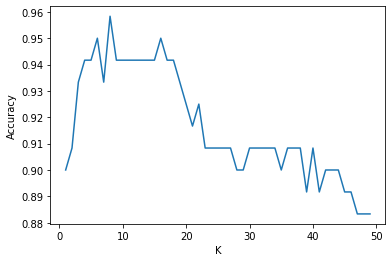

In [7]:
plt.plot(range(1, 50), accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')